# <center> [Adult salaries](https://archive.ics.uci.edu/ml/datasets/adult): Gradien boosting
### <center>Predict whether income exceeds $50K/yr based on census data.

Link: https://www.kaggle.com/mattmet/income-prediction-xgboost-accuracy-86-02

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Leer CSV

In [2]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./../data/ https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/data/adult.csv

In [3]:
df = pd.read_csv("../data/adult.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


# Qué queremos predecir? -> `df.Survived`

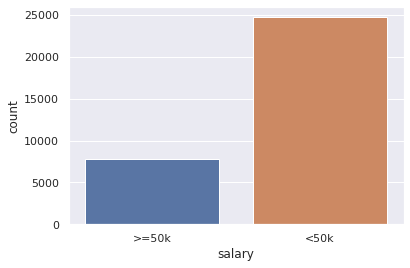

In [6]:
sns.countplot(df.salary);

# Variables

In [7]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)
print("\nDate/time features:\n", time.values)


Numerical features:
 ['age' 'fnlwgt' 'education-num' 'capital-gain' 'capital-loss'
 'hours-per-week']

Categorical features:
 ['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'sex' 'native-country' 'salary']

Date/time features:
 []


# Missings

In [8]:
df.shape

(32561, 15)

In [9]:
df = df.dropna(axis='rows')
df.shape

(31812, 15)

# Categorical

In [12]:
df[cat] = df[cat].apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1,44,4,236746,12,14.0,0,4,1,4,1,10520,0,45,39,1
3,38,5,112847,14,15.0,2,10,0,1,1,0,0,40,39,1
5,20,4,63210,11,9.0,4,6,3,4,1,0,0,15,39,0
8,46,4,328216,11,9.0,2,3,0,4,1,0,0,40,39,1
21,26,4,746432,11,9.0,4,6,3,2,1,0,0,48,39,0


# Models

In [ ]:
x = df[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'
       ]]
y = df["salary"]

In [50]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree',       DecisionTreeClassifier()),
    ('Random Forest',       RandomForestClassifier()),
    ('Gradient Boosting',   GradientBoostingClassifier()),
    ('XGBoost',             XGBClassifier(n_estimators=250))
]

outcome = []
Modelnames = []

for name, model in models:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    cv_r = cross_val_score(model, x, y, cv=skf, scoring='accuracy')
    outcome.append(cv_r)
    Modelnames.append(name)
    print("%s: %.2f%% (%.2f%%)" % (name, cv_r.mean()*100, cv_r.std()*100))

/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  )
/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  )


Logistic Regression: 78.99% (0.63%)
Decision Tree: 81.34% (0.33%)
Random Forest: 85.70% (0.23%)
Gradient Boosting: 86.56% (0.35%)
XGBoost: 87.03% (0.41%)


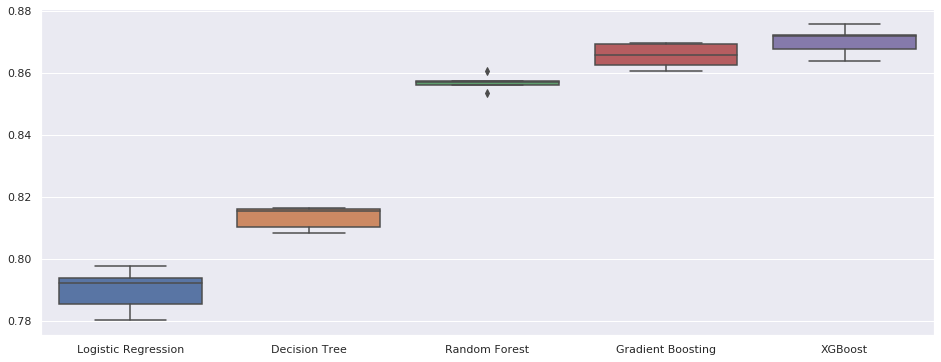

In [51]:
results ={'Names': Modelnames,'Results': outcome}
plt.figure(figsize=(16,6))
sns.boxplot(x='Names',y='Results',data=results)